### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
help(px.line)

Help on function line in module plotly.express._chart_types:

line(data_frame=None, x=None, y=None, line_group=None, color=None, line_dash=None, symbol=None, hover_name=None, hover_data=None, custom_data=None, text=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, orientation=None, color_discrete_sequence=None, color_discrete_map=None, line_dash_sequence=None, line_dash_map=None, symbol_sequence=None, symbol_map=None, markers=False, log_x=False, log_y=False, range_x=None, range_y=None, line_shape=None, render_mode='auto', title=None, template=None, width=None, height=None)
        In a 2D line plot, each row of `data_frame` is represented as vertex of
        a polyline mark in 2D space.
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        This ar

In [4]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    return px.line(
        DF, 
        x = DF.index, 
        y = Countries, 
        labels = {'x': xlabel, 'y': name}, 
        title = name+' wrt Date in Countries', 
        log_y = True if scale=='log' else False, 
        template = 'plotly_dark',
    )

In [5]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    fig = go.Figure()
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        fig.add_trace(
            go.Scatter(
                x = DF[col], 
                y = DF2[col], 
                mode = 'lines', 
                name = col,
            )
        )
    
    fig.update_xaxes(type= scale)
    fig.update_yaxes(type= scale)
    
    return fig.update_layout(title = f'{name1} wrt {name2} in Countries', 
                  xaxis_title = name2, 
                  yaxis_title = name1
                 )

In [6]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
#     columns = DF.columns
    columns = [t for t in columns if 'World' not in t][::-1]
    DF = DF.copy()
    DF['Rest of Earth'] = DF.World
    for col in columns:
        DF['Rest of Earth'] -= DF[col]
        
    columns.append('Rest of Earth')
    
    
    
    return px.area(
        DF, 
        x = DF.index, 
        y = columns, 
        labels = {'x': 'Date', 'y': name}, 
        title = name+' wrt Date in Countries', 
        template = 'plotly_dark',
    )

### Importing the Data from Johns Hopkins data

In [7]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [8]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [9]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [10]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [11]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [12]:
Deaths[Countries].tail(5)

Country/Region   India    World      US  Brazil  Mexico      UK   Italy  \
2021-10-30      458186  4995464  745668  607694  288276  140981  132074   
2021-10-31      458437  4999871  745832  607824  288365  141055  132100   
2021-11-01      458880  5006130  747057  607922  288365  141098  132120   
2021-11-02      459191  5013621  748518  608071  288464  141390  132161   
2021-11-03      459652  5021914  750424  608235  288733  141607  132224   

Country/Region  Russia  France  Germany  Spain  Colombia    Iran  China  \
2021-10-30      233063  118612    95734  87368    127258  126126   4849   
2021-10-31      234194  118625    95735  87368    127281  126303   4849   
2021-11-01      235318  118632    95838  87368    127311  126456   4849   
2021-11-02      236462  118720    96031  87423    127348  126616   4849   
2021-11-03      237619  118758    96196  87462    127380  126763   4849   

Country/Region    Peru  
2021-10-30      200217  
2021-10-31      200246  
2021-11-01      200276  
2021-11-02      200276  
2021-11-03      200326

In [13]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [14]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region  India   World      US  Brazil  Mexico     UK  Italy  Russia  \
2021-10-30      12830  382109   29302   10693    3478  41009   4877   39203   
2021-10-31      12514  306440   17599    6761    1446  37732   4525   39931   
2021-11-01      10423  431653  125473    3838       0  39999   2818   39321   
2021-11-02      11903  430206   72754    6431     994  33712   2831   37927   
2021-11-03      12885  517528   83783   14661    3588  41530   5188   39357   

Country/Region  France  Germany  Spain  Colombia   Iran  China  Peru  
2021-10-30        7399    17248      0      1629   6809     75  1032  
2021-10-31        6349     -554      0      1710   8427     92   888  
2021-11-01        1883    11315      0      1590   9857     72   393  
2021-11-02        2106    30691   5820      1425  10104    112     0  
2021-11-03       10307    34498   2287      1697  10363    106  1121

In [15]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region  India   World     US  Brazil  Mexico     UK  Italy  Russia  \
2021-10-30      17409  437854  83808   13513    5044  41055   3644   32148   
2021-10-31      17083  429093  79394   13063    4804  40833   3703   32667   
2021-11-01      16639  429264  82466   12448    4484  40777   3644   33110   
2021-11-02      16323  429326  81818   12047    4251  40306   3590   33431   
2021-11-03      16094  435206  81949   12221    4207  40388   3696   33826   

Country/Region  France  Germany  Spain  Colombia   Iran  China  Peru  
2021-10-30        5901    14330   2058      1538  11459     45   853  
2021-10-31        5931    13338   1920      1549  11257     48   855  
2021-11-01        5661    13203   1792      1552  11163     49   824  
2021-11-02        5424    14369   2061      1543  11093     54   769  
2021-11-03        5749    15711   2076      1554  11044     57   793

In [16]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [17]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region  India  World    US  Brazil  Mexico   UK  Italy  Russia  \
2021-10-30        446   5932   291     232     325  166     37    1132   
2021-10-31        251   4407   164     130      89   74     26    1131   
2021-11-01        443   6259  1225      98       0   43     20    1124   
2021-11-02        311   7491  1461     149      99  292     41    1144   
2021-11-03        461   8293  1906     164     269  217     63    1157   

Country/Region  France  Germany  Spain  Colombia  Iran  China  Peru  
2021-10-30          22       33      0        33   128      0    20  
2021-10-31          13        1      0        23   177      0    29  
2021-11-01           7      103      0        30   153      0    30  
2021-11-02          88      193     55        37   160      0     0  
2021-11-03          38      165     39        32   147      0    50

### Exponential Weighted Mean

In [18]:
EWM = np.round(Daily_Deaths.ewm(com=14).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(14))/14, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region   India    World       US  Brazil  Mexico      UK  Italy  \
2021-10-30      394.51  7311.84  1529.92  378.65  362.63  142.50  40.72   
2021-10-31      384.94  7118.18  1438.86  362.07  344.39  137.94  39.74   
2021-11-01      388.81  7060.90  1424.60  344.47  321.43  131.61  38.43   
2021-11-02      383.63  7089.58  1427.03  331.44  306.60  142.30  38.60   
2021-11-03      388.78  7169.81  1458.96  320.28  304.10  147.28  40.22   

Country/Region   Russia  France  Germany  Spain  Colombia    Iran  China  \
2021-10-30       997.74   39.81    72.53  34.38     34.59  199.69    0.0   
2021-10-31      1006.62   38.02    67.76  32.09     33.82  198.18    0.0   
2021-11-01      1014.45   35.95    70.11  29.95     33.56  195.17    0.0   
2021-11-02      1023.08   39.42    78.30  31.62     33.79  192.82    0.0   
2021-11-03      1032.01   39.33    84.08  32.11     33.67  189.77    0.0   

Country/Region   Peru  
2021-10-30      28.87  
2021-10-31      28.88  
2021-11-01      28.95  
2021-11-02      27.02  
2021-11-03      28.55

In [19]:
plotter(np.round(AVG), name)

In [20]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

In [21]:
stackplotter(AVG, name)

<Figure size 1008x504 with 0 Axes>

In [22]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

<Figure size 1008x504 with 0 Axes>

### Reproductivity

In [23]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

In [24]:
plotter(Reproductivity, 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

In [26]:
plotter(Testrate, 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A, 'Reproductivity', xlabel)

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

Deaths  Daily_Deaths  Weekly_Deaths     EWM7  Reproductivity  \
Country                                                                    
World      5021914          8293        7028.79  7169.81          0.9709   
US          750424          1906        1270.71  1458.96          0.8253   
Brazil      608235           164         286.21   320.28          0.7740   
India       459652           461         488.64   388.78          1.6078   
Mexico      288733           269         241.86   304.10          0.7249   
Russia      237619          1157        1092.79  1032.01          1.1295   
Peru        200326            50          27.21    28.55          0.9288   
Indonesia   143481            24          28.86    62.08          0.5277   
UK          141607           217         154.50   147.28          1.1590   
Italy       132224            63          38.29    40.22          0.9472   
Colombia    127380            32          32.07    33.67          0.9210   
Iran        126763           147         155.57   189.77          0.7693   

           Confirmed  Testrate  Confirmed_EWM  Estimated(M)  
Country                                                      
World      248093646     0.303         435206       1004.38  
US          46252795     0.281          81949        150.08  
Brazil      21835785     0.191          12221        121.65  
India       34321025     0.207          16094         91.93  
Mexico       3811793     0.069           4207         57.75  
Russia       8494589     0.164          33826         47.52  
Peru         2203310     0.139            793         40.07  
Indonesia    4246174     0.096           1187         28.70  
UK           9215683     1.371          40388         28.32  
Italy        4782802     0.459           3696         26.44  
Colombia     5007099     0.231           1554         25.48  
Iran         5954962     0.291          11044         25.35

In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

Deaths  Daily_Deaths  Weekly_Deaths     EWM7  Reproductivity  \
Country                                                                      
World        5021914          8293        7028.79  7169.81          0.9709   
US            750424          1906        1270.71  1458.96          0.8253   
Russia        237619          1157        1092.79  1032.01          1.1295   
Ukraine        73888           752         572.29   460.22          1.7130   
India         459652           461         488.64   388.78          1.6078   
Romania        49115           451         434.00   375.04          1.3855   
Brazil        608235           164         286.21   320.28          0.7740   
Mexico        288733           269         241.86   304.10          0.7249   
Turkey         71298           246         216.00   216.33          1.0073   
Philippines    43586           182         186.36   167.24          1.1809   
Iran          126763           147         155.57   189.77          0.7693   
UK            141607           217         154.50   147.28          1.1590   

             Confirmed  Testrate  Confirmed_EWM  Estimated(M)  
Country                                                        
World        248093646     0.303         435206       1004.38  
US            46252795     0.281          81949        150.08  
Russia         8494589     0.164          33826         47.52  
Ukraine        3118140     0.200          18387         14.78  
India         34321025     0.207          16094         91.93  
Romania        1676293     0.158          11823          9.82  
Brazil        21835785     0.191          12221        121.65  
Mexico         3811793     0.069           4207         57.75  
Turkey         8121196     0.638          27614         14.26  
Philippines    2793898     0.193           6444          8.72  
Iran           5954962     0.291          11044         25.35  
UK             9215683     1.371          40388         28.32

### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5021914


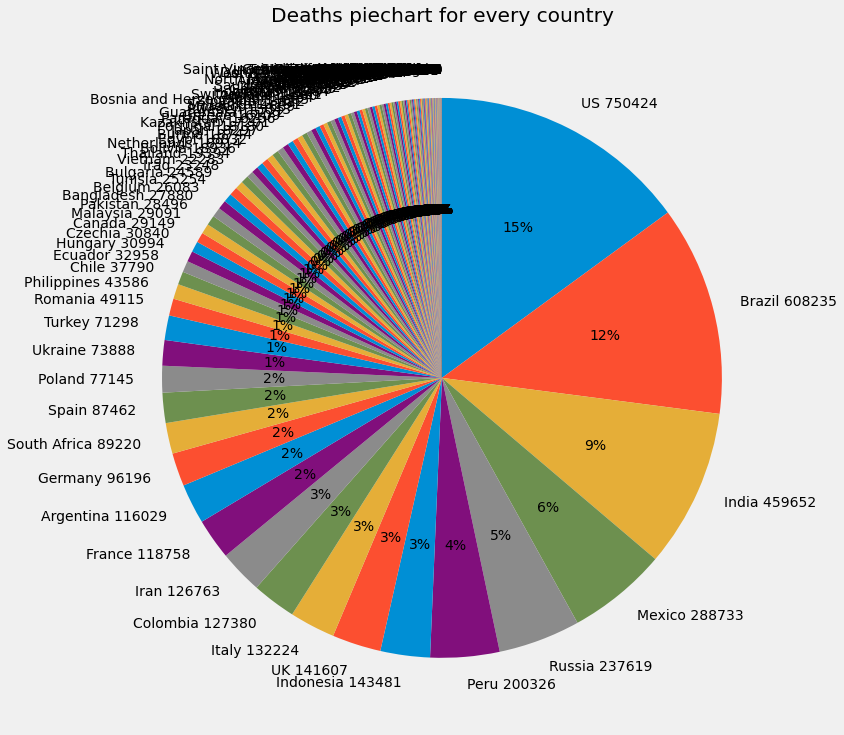

In [35]:
piechart('Deaths')

World total:  7028


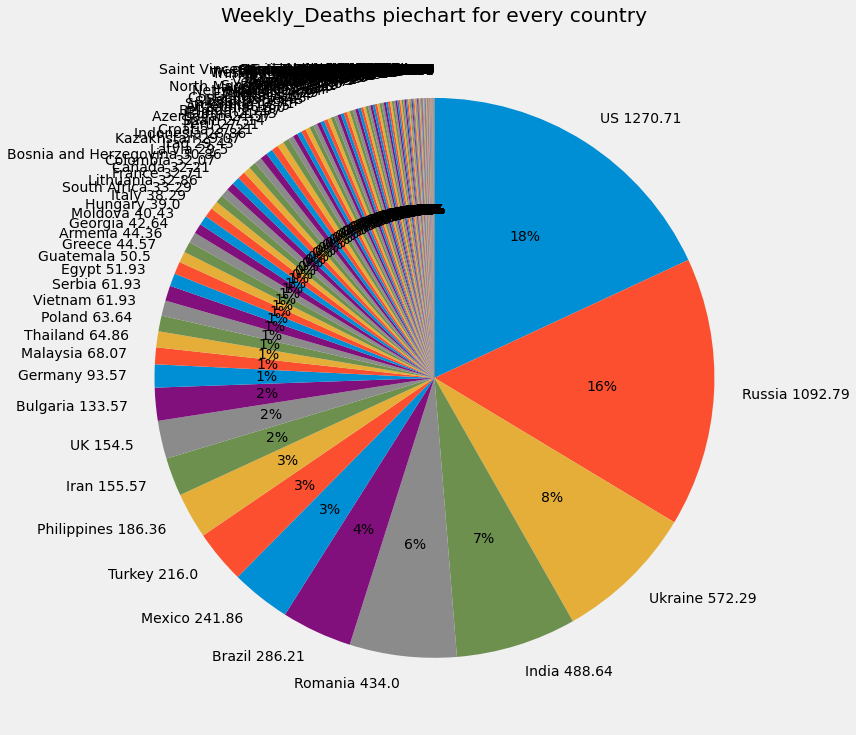

In [36]:
piechart('Weekly_Deaths')

World total:  8293


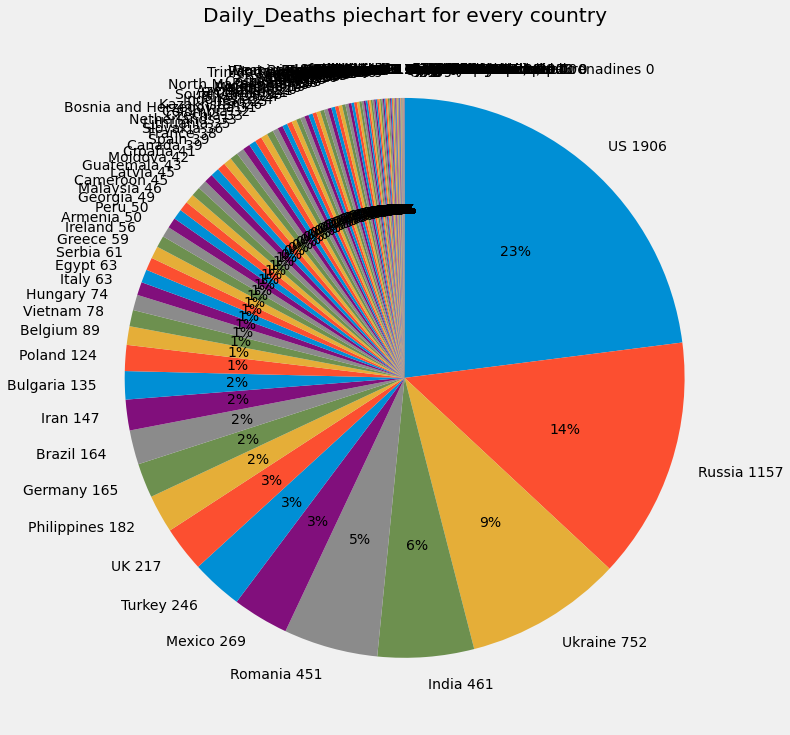

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-11-05


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

1004382800.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>